## SciPy를 사용한 기초적인 검정
SciPy 파이썬 패키지는 다음과 같은 다양한 검정 명령을 제공한다.

    이항 검정 (Binomial test)
    카이 제곱 검정 (Chi-square test)
    단일 표본 z-검정 (One-sample z-test)
    단일 표본 t-검정 (One-sample t-test)
    독립 표본 t-검정 (Independent-two-sample t-test)
    대응 표본 t-검정 (Paired-two-sample t-test)
    분산 검정 (Chi squared variance test)
    등분산 검정 (Equal-variance test)
    정규성 검정 (Normality test)

### 이항 검정 (Binomial test)
이항 검정은 이항 분포를 이용하여 Bernoulli 분포 모수 $θ$에 대한 가설을 조사하는 검정 방법이다. SciPy stats 서브패키지의 binom_test 명령은 이항 검정의 유의 확률을 계산한다. 디폴트 귀무 가설은 $θ=0.5$이다.

`sp.stats.binom_test(12, 15, alternative="greater")`

양측검정일 경우 인수에서 `alternative="two-sided"`(default), 우측은 `'greater'` 좌측은 `'less'`로 지정
- scipy.stats.binom_test
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html

In [9]:
# 데이터 개수 N = 10, 실제모수 θ_0=0.5인 경우의 이항검정
N = 10
theta_0 = 0.5
x = sp.stats.bernoulli(theta_0).rvs(N)
x

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [10]:
n = np.count_nonzero(x)
n

6

In [11]:
sp.stats.binom_test(n, N)

0.7539062500000002

유의확률(p-value)이 34%로 높으므로 귀무가설을 기각할 수 없다. 따라서 $θ$=0.5이다.

In [16]:
# N = 100, theta_0 = 0.5인 경우 이항검정
N = 100
theta_0 = 0.5
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
x, n

(array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0]), 45)

In [17]:
sp.stats.binom_test(n, N)

0.36820161732669654

유의확률(p-value)이 37%로 높으므로 귀무가설을 기각할 수 없다. 따라서 $θ$=0.5이다.

In [19]:
# N=100 , 실제 모수 θ0=0.35인 경우 대해 이항 검정 
N = 100
theta_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [20]:
sp.stats.binom_test(n, N)

0.00018314322488235352

유의 확률(p-value)이 0.018%로 낮으므로 귀무 가설을 기각할 수 있다. 따라서 $θ≠0.5$이다.

##### 연습 문제 1
1. N = 10이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야지 동전이 fair하지 않다고 이야기 할 수 있을까?
2. N = 1000이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야지 동전이 fair하지 않다고 이야기 할 수 있을까? 이 때 fair하다고 이야기할 수 있는 경우의 범위는 N=10일 때와 비교하여 넓은가 혹은 좁은가?

In [43]:
# N = 10, p_value < 0.1 일때, n의 횟수
sp.stats.binom_test(2, 10), sp.stats.binom_test(1, 10)

(0.10937500000000003, 0.021484374999999997)

In [44]:
sp.stats.binom_test(8, 10), sp.stats.binom_test(9, 10)

(0.10937500000000003, 0.021484374999999997)

앞면이 9번 이상 1번 이하로 나와야 p-value가 0.10보다 작아져서 동전이 fair하지 않다고 이야기 할 수 있다.

In [45]:
# N = 1000, p_value < 0.1 일때, n의 횟수
sp.stats.binom_test(474, 1000), sp.stats.binom_test(473, 1000)

(0.10674954203435372, 0.09368729147551143)

In [46]:
# N = 1000, p_value < 0.1 일때, n의 횟수
sp.stats.binom_test(526, 1000), sp.stats.binom_test(527, 1000)

(0.10674954203435372, 0.09368729147551143)

앞면이 527이상 473이하로 나와야 p-value가 0.10보다 작아져서 동전이 fair하지 않다고 이야기 할 수 있다. 던지는 횟수 N이 커질 수록 확률이 모수값에 가까워질 가능성이 높으므로 기각역이 커진다(모수를 accept하는 구역이 작아진다).

##### 연습 문제 2
N = 100이고 앞면이 나온 횟수는 40번이다. 유의 수준이 1%라면 앞면이 나온 횟수가 몇 번이어야지  θ=0.4 라고 이야기 할 수 있을까?

In [77]:
# N = 100, n = 40, p-value 0.1
sp.stats.binom_test(27, 100, p=0.4), sp.stats.binom_test(28, 100, p=0.4)

(0.007798368295956181, 0.014193181491983224)

In [93]:
sp.stats.binom_test(53, 100, p=0.4), sp.stats.binom_test(54, 100, p=0.4)

(0.010361082349988119, 0.005593598926589128)

앞면이 28번 이상 53번 이하가 나와야 귀무가설을 기각할 수 없어 theta=0.4가 아니라고 할 수 없다.

##### 연습 문제 3
다음 코드를 실행하면 어느 식당의 판매 기록을 구할 수 있다. 하나의 레코드(행)이 한 명의 손님을 나타낸다고 가정하자. 다른 열에는 성별(sex), 흡연유무(smoker), 점심/저녁(time) 등을 나타내는 데이터가 있다. 이항 검정을 사용하여 다음 문제를 풀어라.

`import seaborn as sns
tips = sns.load_dataset("tips")`
1. 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?
2. 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

In [95]:
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [96]:
%matplotlib inline

In [109]:
a = tips.pivot_table("size", "sex", "smoker", aggfunc="count")
a

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [113]:
sp.stats.binom_test(a.loc["Female", "No"], a.loc["Female"].sum(), alternative="greater")

0.015709055116923068

비흡연자, 흡연자의 수를 세는 문제이므로 이항분포를 사용하며, 귀무가설이 $θ=0.5$이고 대립가설이 $θ>0.5$이므로 5% 수준에서는 비흡연자가 더 많다고 할 수 있지만 1% 수준에서는 귀무가설을 기각할 수 없으므로 비흡연자가 더 많다고 할 수 없다.

### 카이 제곱 검정 (Chi-square test)
카이 제곱 검정은 goodness of fit 검정이라고도 부른다. 카테고리 분포의 모수 $θ=(θ1,…,θK)$에 대한 가설을 조사하는 검정 방법이다. 원래 카테고리 $k$가 나와야 할 횟수의 기댓값 $m_k$와 실제 나온 횟수 $x_k$의 차이를 이용하여 다음처럼 검정 통계량을 구한다.
$$\sum_{k=1}^K \dfrac{(x_k - m_k)^2}{m_k}$$
SciPy stats 서브패키지의 `chisquare` 명령은 카이 제곱 검정의 검정 통계량과 유의 확률을 계산한다. 디폴트 귀무 가설은  $\theta = \left(\frac{1}{K}, \ldots, \frac{1}{K} \right)$ 이다.

- scipy.stats.chisquare
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

데이터 갯수 $N=10$, 실제 모수 $θ_0=(0.25,0.25,0.25,0.25)$인 경우 대해 카이 제곱 검정 명령을 실시해 보자.

In [5]:
N = 10
K = 4
theta_0 = np.ones(K)/K
x = np.random.choice(K, N, p=theta_0)
x

array([2, 3, 0, 2, 0, 1, 3, 1, 1, 3], dtype=int64)

In [6]:
n = np.bincount(x, minlength=K)
n

array([2, 3, 2, 3], dtype=int64)

In [118]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

유의 확률(p-value)이 15.8%로 높으므로 귀무 가설을 기각할 수 없다. 따라서 $θ_0=(0.25,0.25,0.25,0.25)$이다.

---
이번에는 데이터 갯수 $N=100$, 실제 모수 $θ_0=(0.35,0.30,0.20,0.15)$인 경우 대해 카이 제곱 검정 명령을 실시해 보자.

In [123]:
N = 100
K = 4
theta_0 = np.array([0.35,0.30,0.20,0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11], dtype=int64)

In [124]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

유의 확률(p-value)이 0.087%로 낮으므로 귀무 가설을 기각할 수 있다. 따라서 모수가 $\theta \neq (0.25, 0.25, 0.25, 0.25))$라고 할 수 있다.

#### 연습 문제 4
4면체 주사위를 10번 던졌다. 만약 10번 모두 1이 나왔다면 주사위가 공정하다는 귀무 가설의 유의 확률은 얼마인가?

In [131]:
N = 10
K = 4
sp.stats.chisquare([10, 0, 0, 0])

Power_divergenceResult(statistic=30.0, pvalue=1.3800570312932553e-06)

귀무가설의 유의확률은 1.38*10^(-6)으로 주사위는 공정하다고 할 수 없다.

### 카이제곱검정의 응용 - Chi-Squared Test of Independence
**카이 제곱 검정은 두 카테고리 변수가 독립인지를 판단하는 검정방법이다. 즉, 어떤 카테고리 변수  $X$ 가 다른 카테고리 변수  $Y$ 와 상관 관계를 가지는가를 검증하는데도 사용할 수 있다.** 만약 카테고리 변수  $X$ 의 값이 0일 때의  $Y$ 의 분포와 카테고리 변수  $X$ 의 값이 1일 때의  $Y$ 의 분포가 많이 다르다면 카테고리 변수  $X$ 는 카테고리 변수  $Y$ 에 영향을 미치고 있다, 이때 귀무가설은 '두 카테고리 변수는 독립이다.'이다.

SciPy의 `chi2_contingency` 명령은 이러한 검정을 수행한다.  $X$ 의 값에 따른 각각의  $Y$ 의 분포가 2차원 표(contingency table)의 형태로 주어지면 $y$ 분포의 평균 분포와 실제 $y$ 분포의 차이를 검정 통계량으로 계산한다. 이 값이 충분히 크다면  $X$ 와  $Y$ 는 상관 관계가 있다. `chi2_contingency` 명령의 결과는 튜플로 반환되며 첫번째 값이 검정 통계량, 두번째 값이 유의 확률이다.

- 참고 사이트
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html?q=chi+2+independence
___
예를 들어  $X$ 가 0일 때  $Y$ 가  $10,10,20$ 이었고  $X$ 가 1일 때  Y 가  $20,20,20$ 이면 카이 제곱 검정의 유의 확률은 다음처럼 24.9%가 나온다. 즉  $X$ 와  $Y$ 는 상관 관계가 없다.

In [133]:
obs = np.array([[10, 10, 20], [20, 20, 20]])
sp.stats.chi2_contingency(obs)

(2.7777777777777777, 0.24935220877729622, 2, array([[12., 12., 16.],
        [18., 18., 24.]]))

##### 연습 문제 5
다음 코드를 실행하면 식당 손님의 성별과 요일에 따른 방문객수를 나타내는 표를 구할 수 있다.
```
import seaborn as sns
tips = sns.load_dataset("tips")
tips.pivot_table(index="sex", columns="day", aggfunc="size")
```
이 결과에 따르면 성별에 따라 식당을 많이 방문하는 요일이 달라진다고 이야기할 수 있는가?

In [135]:
import seaborn as sns
tips = sns.load_dataset("tips")
b = tips.pivot_table(index="sex", columns="day", aggfunc="size")
b

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [144]:
sp.stats.chi2_contingency([b.loc["Male"], b.loc["Female"]])

(13.22200137240661,
 0.004180302092822257,
 3,
 array([[39.89344262, 12.22540984, 55.9795082 , 48.90163934],
        [22.10655738,  6.77459016, 31.0204918 , 27.09836066]]))

p-value는 0.418%이므로 성별에 따라 식당을 방문하는 요일이 달라진다고 할 수 있다

### 단일 표본 z-검정 (One-sample z-test)
단일 표본 z-검정은 분산 $σ^2$의 값을 정확히 알고 있는 정규 분포의 표본에 대해 기댓값을 조사하는 검정방법이다. 실제로 $σ^2$의 값을 알고 있는 경우가 많이 없으므로 현실에서는 많이 쓰이지 않는다. 단일 표본 z-검정의 경우에는 SciPy에 별도의 함수가 준비되어 있지 않으므로 norm 명령의 cdf 메서드를 사용하여 직접 구현해야 한다.

scipy.stats.norm

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

---
데이터 갯수  $N=10$, 실제 모수 $μ_0=0$인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

In [23]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

단일 표본 z-검정 함수를 다음처럼 구현할 수 있다. 이 함수는 검정 통계량과 유의 확률을 반환한다.

In [26]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu)/ np.sqrt(sigma2/len(x))
    return z, (2 * sp.stats.norm().sf(np.abs(z)))

In [28]:
ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

유의 확률(p-value)이 1.96%이므로 만약 유의 수준이 5% 이상 이라면 귀무 가설을 기각할 수 있다. 따라서 $μ≠0$이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.

오류의 유형 중에서 이러한 오류는 귀무 가설이 진실임에도 불구하고 거짓으로 나온 경우로 **유형 1 오류(Type 1 Error)**라고 한다.

---
데이터 갯수  N=100 , 실제 모수  μ0=0 인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

In [30]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)

In [31]:
ztest_1samp(x)

(0.5980801553448499, 0.5497864508624168)

유의 확률(p-value)이 54.98%이므로 귀무 가설을 기각할 수 없다. 따라서 $μ=0$이다.

### 단일 표본 t-검정 (One-sample t-test)
단일 표본 t-검정은 정규 분포의 표본에 대해 기댓값을 조사하는 검정방법이다. SciPy의 stats 서브 패키지의 `ttest_1samp` 명령을 사용한다. `ttest_1samp` 명령의 경우에는 디폴트 모수가 없으므로 `popmean` 인수를 사용하여 직접 지정해야 한다.

scipy.stats.ttest_1samp

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

---
데이터 갯수  N=10 , 실제 모수 $μ_0=0$인 경우 대해 단일 표본 t-검정 명령을 실시해 보자.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


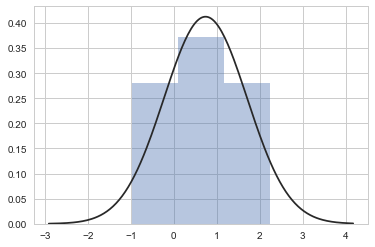

In [37]:
%matplotlib inline
N = 10
mu0 = 0
np.random.seed(0)
x = sp.stats.norm(mu0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [38]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

유의 확률(p-value)이 4.78%이므로 만약 유의 수준이 5% 이상 이라면 귀무 가설을 기각할 수 있다. 따라서 $μ≠0$이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.

---
데이터 갯수  N=100 , 실제 모수  μ0=0 인 경우 대해 단일 표본 t-검정 명령을 실시해 보자.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


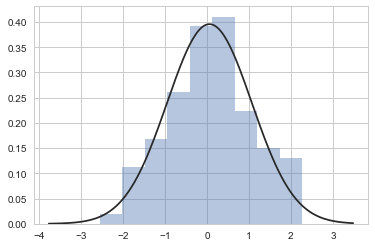

In [39]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [42]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

유의 확률(p-value)이 55.62%이므로 귀무 가설을 기각할 수 없다. 따라서  μ=0 이다.

### 독립 표본 t-검정 (Independent-two-sample t-test)
독립 표본 t-검정(Independent-two-sample t-test)은 간단하게 two sample t-검정이라고도 한다. **두 개의 독립적인 정규 분포에서 나온 두 개의 데이터 셋을 사용하여 두 정규 분포의 기댓값이 동일한지를 검사**한다. SciPy stats 서브패키지의 `ttest_ind` 명령을 사용한다. 독립 표본 t-검정은 두 정규 분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정 통계량이 다르기 때문에 `equal_var`인수를 사용하여 이를 지정해 주어야 한다.

두 정규 분포의 분산이 같은 지는 t-검정을 하기 전에 등분산검정 3종류를 해보고, 모두 동일한 결과가 나오는지 확인 한 후 `equal_var` 인수를 True 또는 False로 지정하여 분석한다.

**one-tailed t-test는 동일하게 검정을 시행한 후 검정결과에서 $\frac{P}{2} < \alpha,  t > 0$이면, x1의 평균이 x2보다 크고, $\frac{p}{2} < \alpha,  t < 0$이면 x1 평균이 x2 평균보다 작다는 대립가설을 채택할 수 있다.**

scipy.stats.ttest_ind

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

---
두 정규 분포의 기댓값이 $μ_1=0$, $μ_2=0.5$로 다르고 분산은 $σ_1=σ_2=1$ 으로 같으며 샘플의 수가 $N1=N2=10$인 경우를 실행해 보자

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


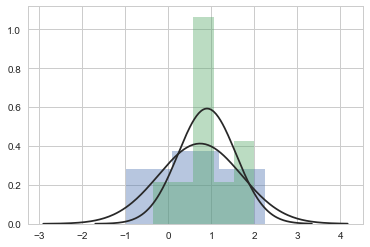

In [49]:
N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1).rvs(N_1)
x2 = sp.stats.norm(mu_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [50]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6837676894116427)

유의 확률(p-value)이 68.4%이므로 귀무 가설을 기각할 수 없다. 따라서 $μ_1=μ_2$이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다.

오류의 유형 중에서 이러한 오류는 **귀무 가설이 거짓임에도 불구하고 진실로 나온 경우로 유형 2 오류(Type 2 Error)**라고 한다.

데이터 수가 증가하면 이러한 오류가 발생할 가능성이 줄어든다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


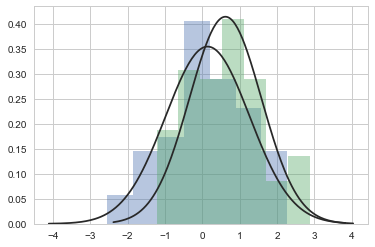

In [51]:
N_1 = 50; mu_1 = 0; sigma_1 = 1
N_2 = 100; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [52]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.008133970915722658)

데이터의 갯수를 50개와 100개로 증가시킨 경우에 유의 확률은 0.8%로 감소하였다. 따라서 두 확률 분포의 기댓값이 일치한다는 귀무 가설은 기각할 수 있다.

In [90]:
N = 5; mu1 = 0; mu2 = 0
np.random.seed(1)
x1 = sp.stats.norm(mu1).rvs(N)
x2 = x1 + sp.stats.norm(mu2, 0.1).rvs(N)

In [91]:
x1.mean(), x2.mean(), sp.stats.ttest_ind(x1, x2)

(0.055371240983643745,
 0.03040593872405937,
 Ttest_indResult(statistic=0.036295549326266094, pvalue=0.9719360250277527))

현실에서는 모평균을 모르기 때문에 5개의 샘플의 수로 독립표본 t-검정을 한 결과 표본 1과 표본 2의 평균은 다르게 나왔지만 p-value는 0.97로 귀무가설을 기각할 수 없으므로 두 샘플의 모평균은 같다고 할 수 있다. 계산된 평균값은 쓸 수 없다?

##### 연습 문제 6
1반과 2반 학생 들의 성적이 각각 다음과 같다고 가정하자.

- 1반 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점,
- 2반 : 80점, 85점, 70점, 80점, 35점, 55점, 80점
1반의 실력이 2반보다 좋다고 이야기 할 수 있는가?

In [55]:
c1 = np.array([80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80])
c2 = np.array([80, 85, 70, 80, 35, 55, 80])

In [56]:
sp.stats.ttest_ind(c1, c2)

Ttest_indResult(statistic=0.623010926550264, pvalue=0.5415458608473267)

유의확률이 54.2%로 귀무가설을 기각할 수 없다. 1반의 실력이 2반보다 좋다고 이야기할 수 없다.

### 대응 표본 t-검정 (Paired-two-sample t-test)
대응 표본 t-검정은 독립 표본 t-검정을 두 집단의 샘플이 1대1 대응하는 경우에 대해 수정한 것이다. 즉, 독립 표본 t-검정과 마찬가지로 **두 정규 분포의 기댓값이 같은지 확인하기 위한 검정**이다.

예를 들어 어떤 반의 학생들이 특강을 수강하기 전과 수강한 이후에 각각 시험을 본 시험 점수의 경우에는 같은 학생의 두 점수는 대응할 수 있다. 이 대응 정보를 알고 있다면 보통의 독립 표본 t-검정에서 발생할 수 있는 샘플간의 차이의 영향을 없앨 수 있기 때문에 특강 수강의 영향을 보다 정확하게 추정할 수 있다.

scipy.stats.ttest_rel

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

---
$μ_1=0$, $μ_2=0.5$로 평균이 달라진 경우에 대해 대응 표본 t-검정을 실시해 보자. 데이터 갯수  N 은 5 이다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


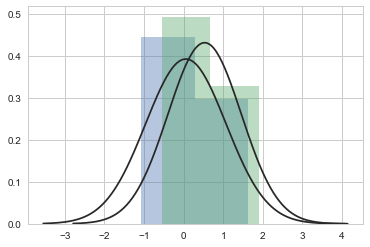

In [86]:
N = 5; mu1 = 0; mu2 = 0.5
np.random.seed(1)
x1 = sp.stats.norm(mu1).rvs(N)
x2 = x1 + sp.stats.norm(mu2, 0.1).rvs(N)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [87]:
x1.mean(), x2.mean(), sp.stats.ttest_rel(x1, x2)

(0.055371240983643745,
 0.5304059387240594,
 Ttest_relResult(statistic=-7.172338066173276, pvalue=0.0020008849290622677))

5 개의 데이터만으로도 두 평균이 다르다는 것을 유의 확률(p-value) 0.2%의 정확도로 알아내었음을 확인할 수 있다.

### 카이 제곱 분산 검정 (Chi-Square Test for the Variance)
지금까지는 정규 분포의 기댓값을 비교하는 검정을 살펴보았다. 이제는 정규 분포의 분산에 대해 살펴보자.

카이 제곱 분산 검정(Chi-Square Test for the Variance)은 **정규 분포의 샘플 분산 값은 정규화 하면 카이 제곱 분포를 따른다는 점을 이용하는 검정 방법**이다.

데이터가 많으면 분산이 정확해 지므로 따로 검정이 필요없다. 
그래서 SciPy는 카이 제곱 분산 검정에 대한 명령이 없으므로 chi2 클래스를 사용하여 직접 구현해야 한다.

In [92]:
def chi2var_test(x, sigma2=1):
    v = x.var(ddof=1)
    t = (len(x) - 1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


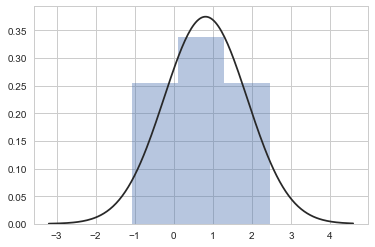

1.0637871321863899

In [93]:
N = 10
mu_0 = 0
sigma_0 = 1.1
np.random.seed(0)
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
x.std()

In [94]:
chi2var_test(x)

(11.316430626053437, 0.2546412358476454)

### 등분산 검정 (Equal-variance test)
등분산 검정은 **두 정규 분포로부터 생성된 두 개의 데이터 집합으로부터 두 정규 분포의 분산 모수가 같은지 확인하기 위한 검정**이다. 가장 기본적인 방법은 F분포를 사용하는 것이지만 실무에서는 이보다 더 성능이 좋은 bartlett, fligner, levene 방법을 주로 사용한다. SciPy의 stats 서브패키지는 이를 위한 `bartlett`, `fligner`, `levene` 명령을 제공한다.

- scipy.stats.bartlett
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html

- scipy.stats.fligner
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html

- scipy.stats.levene
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


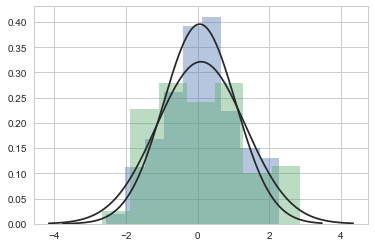

(1.0078822447165796, 1.2416003969261071)

In [95]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
x1.std(), x2.std()

In [96]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [97]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [98]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

유의수준 5%에서 세 개의 검정 결과를 보면 p-value가 0.05보다 작으므로 두 모집단의 분산은 같지 않다고 볼 수 있다. 세 종류의 검정을 모두 해보고 동일한 결과가 나오는지 확인하여 분석해야 한다.

### 정규성 검정
회귀 분석 등에서는 **확률 분포가 가우시안 정규 분포를 따르는지 아닌지를 확인**하는 것이 중요하다. 이러한 검정을 **정규성 검정(normality test)**이라고 한다. 정규성 분포는 중요한만큼 다양한 검정 방법들이 개발되어 있으며 Scipy 패키지 이외에 StatsModels 패키지도 다양한 정규성 검정 명령어를 제공한다.

#### SciPy 에서 제공하는 정규성 검정 명령어
- Kolmogorov-Smirnov test

`scipy.stats.ks_2samp`
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
- Shapiro–Wilk test

`scipy.stats.shapiro`
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
- Anderson–Darling test

`scipy.stats.anderson`
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
- D'Agostino's K-squared test

`scipy.stats.mstats.normaltest`
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.normaltest.html

#### StatsModels에서 제공하는 정규성 검정 명령어
- Omnibus Normality test

`statsmodels.stats.stattools.omni_normtest`
http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.omni_normtest.html
- Jarque–Bera test

`statsmodels.stats.stattools.jarque_bera`
http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.jarque_bera.html
- Kolmogorov-Smirnov test

`statsmodels.stats.diagnostic.kstest_normal`
http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.kstest_normal.html
- Lilliefors test

`statsmodels.stats.diagnostic.lillifors`
http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.lillifors.html

이 중에서 Kolmogorov-Smirnov 검정은 사실 정규 분포에 국한되지 않고 두 샘플이 같은 분포를 따르는지 확인할 수 있는 일반적인 방법이다.

여러 개의 검정 방법을 사용해본 후 결과를 채택한다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


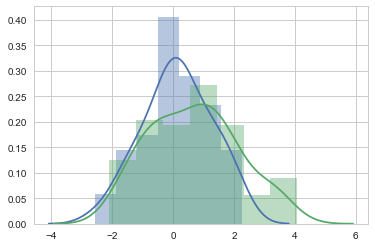

In [100]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
sns.distplot(x1)
sns.distplot(x2)
plt.show()

In [101]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.23000000000000004, pvalue=0.049516112814422863)

유의 확률이 4.95%로 만약 유의 수준이 5%라면 두 분포는 서로 다른 분포라고 볼 수 있다.